<a href="https://colab.research.google.com/github/AmiltonFerreira/wordcloud/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://github.com/AmiltonFerreira/data_science/blob/main/banner.png?raw=true">

# A special gift made with Python

<br>

Is that commemorative date coming up and you ran out of gift options? Are you out of creativity or can't afford an expensive present? How about using your Python skills to create the perfect gift?

It's a fairly simple project, yet it results in a highly original product. With the instructions shown here, you will construct a **word cloud**, using your chat history with the person.

Without any further redo, let's see each step of this process.

## In case you don't know what is a **word cloud**

A **word cloud** is a visual depiction of word frequency in which some keywords are arranged by size and color to form a figure. The more often a term is referred to in a specific set of words (text, book, blog post, movie script, etc.), the bigger, bolder, or darker the word will be shown. The idea is to highlight the recurrent words. Despite not giving precise data values, the word cloud allows you to identify the most relevant topics at a glance.

<br>

<center><img alt="Wordcloud Sample" width="70%" src="https://raw.githubusercontent.com/AmiltonFerreira/wordcloud/main/wordcloud_sample.png?token=GHSAT0AAAAAAB3YOKL7XKHXQDNONMYDFVZ2Y6VUOCQ"><figcaption>Word cloud sample</figcaption> </center>

<br>


## Getting the show on the road

###The needed tools

At first, it's necessary to import the libraries that will be used.  **Matplotlib.pyplot** is used for plotting, creating graphics, and working with figures. **NumPy** allows fast operations on arrays, including mathematical, logical, shape manipulation, sorting and selecting. **Pandas** is an open-source library to work with data structures and data analysis tools for the Python programming language. **Randoem** is a module that implements pseudo-random number generators for various distributions. **Pillow** adds image processing capabilities to your Python interpreter. And **word cloud** is the specific tool to generate the graph.

In [4]:
# import the necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

###The set of words

My suggestion for you is to download the chat (of the conversation between you and the person receiving the gift) from your app of preference as a ".txt" file. The detailed steps in this stage will change depending on your choice. To download your chat from 'WhatsApp' check the instructions on this site.

You can also choose to use the script from their favorite movie or their favorite book.

Heads up with your privacy. You should probably develop the project on your computer rather than in an online environment. For this tutorial, I've used the book "The Odyssey", by Homer.

In [5]:
# Open the file as a string
my_text = open('homer_the-odyssey_william-cullen-bryant.txt').read()

In [6]:
# Convert the text into a list of words
data_into_list = my_text.replace('\n', ' ').split(" ")

Establish your **stopwords**. Stopwords are usually pronouns, prepositions, articles, or any other words necessary for communication but, when taken alone, don't have a significant meaning for the message. "About", "because", "could", and "down" are some examples of possible stopwords.

In [7]:
# Set the list of stopwords
stopwords = set(STOPWORDS) # the wordcloud library itself has a deafault set of "stopwords"
stopwords.update(['word', 'name', 'noun']) # you can add to the set any word at your discreption

### The shape 

By default, the wordcloud library creates a rectangular image similar to the first example of this article. But you can define any shape for your word cloud: a heart, a coffee mug, a balloon – the sky is the limit. Just remember that figures with very detailed contours won't be so clear to notice when it comes to a word cloud.

The figure, which will be a "mask", should have high contrast with the image background so the features can work properly. For this, a good practice is to use images with black and white colors. The program will write the words in the black area of the picture.


<br>

<center><img alt="Heart Mask" width="30%" src="https://raw.githubusercontent.com/AmiltonFerreira/wordcloud/main/heart_mask.png?token=GHSAT0AAAAAAB3YOKL7YT62GONVYCG2SNQSY6VURUQ"><figcaption>Heart Mask</figcaption> </center>

<br>

<center><img alt="Coffee Mask" width="30%" src="https://raw.githubusercontent.com/AmiltonFerreira/wordcloud/main/coffee_mask.png?token=GHSAT0AAAAAAB3YOKL6F6ADBVNZ7E3VKZ44Y6VURMA"><figcaption>Cofee Mask</figcaption> </center>

<br>

You can create a image like this or search for them in google.


In [8]:
# Defining the "mask" that will give shape to your image
heart_mask = np.array(Image.open("heart_mask.png")) # Example 1 - Heart WordCloud
coffee_mask = np.array(Image.open("coffee_mask.png")) # Example 2 - Coffee WordCloud

### The colors

The library **wordcloud** allows all words to be printed with the same or different colors. In this guide, we will select shades of the same color to compose the image. For this, let's create a function that randomly selects the colors that will be applied to the words.

In [9]:
#define the color palette that will compose your project
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs): # Example 1 - Heart WordCloud
    return "hsl(0, 100%%, %d%%)" % random.randint(25, 75) # HSL stands for "Hue, Saturation, and Light"

def brown_color_func(word, font_size, position, orientation, random_state=None, **kwargs):  # Example 2 - Coffee WordCloud
    return "hsl(39, 100%%, %d%%)" % random.randint(10, 40) # HSL stands for "Hue, Saturation, and Light"

### The word cloud

The final step is to generate the word cloud and check and check if any correction is needed.

In [10]:
# Generate the wordcloud
heart_wordcloud = WordCloud(stopwords=stopwords, # Example 1 - Heart WordCloud
                      background_color="white",
                      max_words=2000,
                      mask=heart_mask,
                      max_font_size=130,
                      min_font_size=5).generate(my_text)

coffee_wordcloud = WordCloud(stopwords=stopwords, # Example 2 - Coffee WordCloud
                      background_color="white",
                      max_words=2000,
                      mask=coffee_mask,
                      max_font_size=130,
                      min_font_size=5).generate(my_text)

Plotting the images.

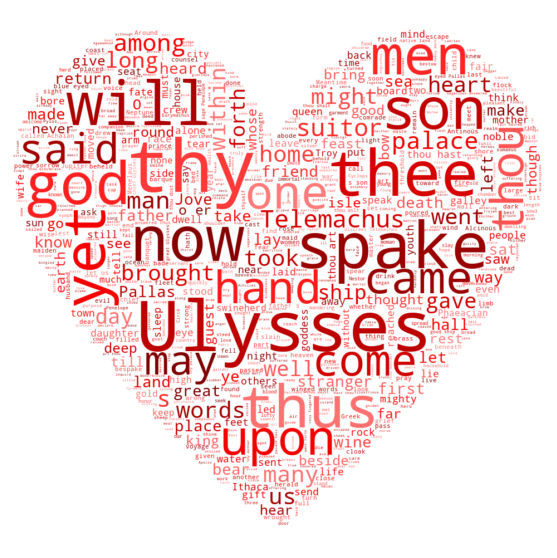

In [11]:
# Show the final image - Example 1 - Heart WordCloud
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(heart_wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(heart_wordcloud.recolor(color_func=red_color_func, random_state=1),interpolation="bilinear")
plt.savefig('heart_text.png', dpi=2000) # Save the image as a ".png" file

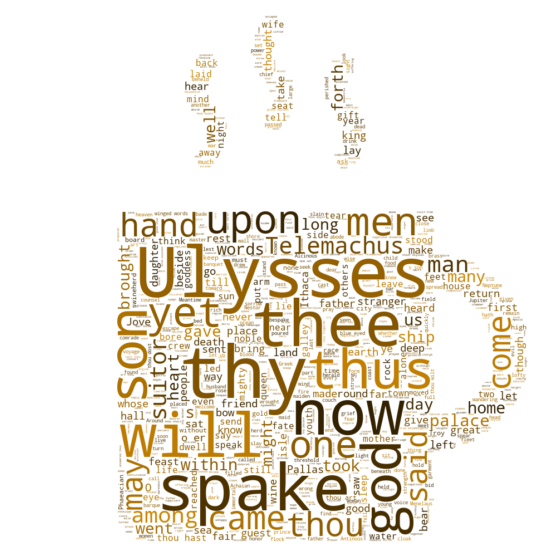

In [16]:
# Show the final image - Example 2 - Heart WordCloud
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(coffee_wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(coffee_wordcloud.recolor(color_func=brown_color_func, random_state=1),interpolation="bilinear")
plt.savefig('coffe_text.png', dpi=2000) # Save the image as a ".png" file

At this point, you might notice some words you'd like to remove from the word cloud. Add them to the stopwords set and then repeat the process to obtain another image.

In [13]:
# Update the stopwords set
stopwords.update()

This process can be simplified by taking a look at the list of the most repeated words. 

In [14]:
# List the most repeated words
all_words = pd.Series(data_into_list).value_counts() # words in "data_into_list" in order of frquency in the text
all_words

                     17605
\t\t\t\t             13758
the                   6386
and                   3923
of                    2473
                     ...  
huntsmen                 1
furrowed                 1
plough,                  1
\t\t\t\tUntilled,        1
unrestricted             1
Length: 15464, dtype: int64

In [15]:
used_words = [word for word in all_words.index if word not in stopwords] 
all_words[used_words]

                     17605
\t\t\t\t             13758
\t\t\t\tAnd           1746
\t\t\t\tThe           1424
I                     1336
                     ...  
huntsmen                 1
furrowed                 1
plough,                  1
\t\t\t\tUntilled,        1
unrestricted             1
Length: 15326, dtype: int64

You may notice that even though they are not in the stopwords, the program automatically disregards words that have a symbol like "/".

### The gift

With the ".png" file you can order a picture frame or have it silked on a shirt. Use your creativity.

## The end

Hope you've enjoined the journey here, and learned not only to create a beautiful and singular gift but also a little more about word clouds.
You can use this knowledge in presentations and reports at school or work.
You can check my complete project on GitHub.

##References

[1] https://github.com/amueller/word_cloud

[2] https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/
